In [20]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util
import time
start = time.time()
plt.rcParams["figure.figsize"] = [15,5]

from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification

In [2]:
data_path = "data/"

In [3]:
accraw = pd.read_csv(data_path + "Accelerometer.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [5]:
gyraw = pd.read_csv(data_path + "Gyroscope.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


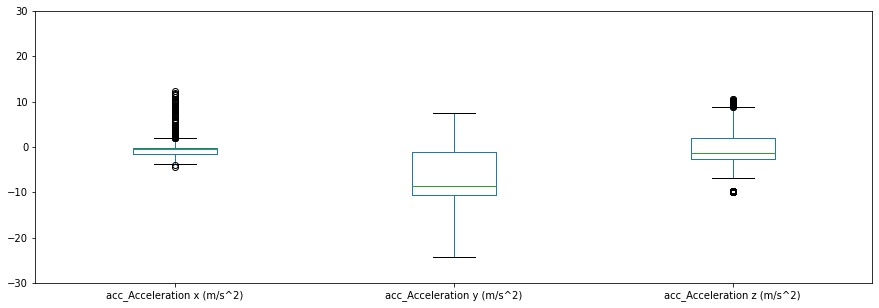

Figure saved to figures/figure_2.png


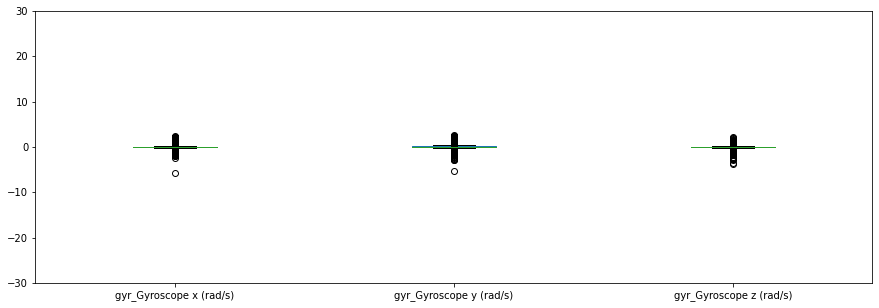

Figure saved to figures/figure_3.png


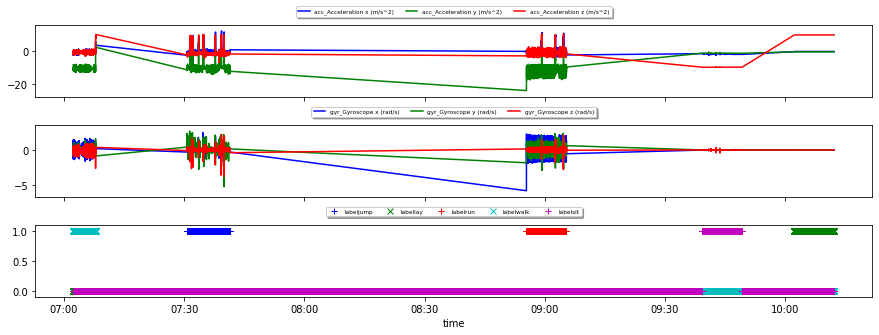

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  labeljump   labellay   labelrun  labelwalk   labelsit
count                 5586.000                 5586.000                 5586.000  22794.000  22794.000  22794.000   22794.00  22794.000
mean                     0.002                    0.056                   -0.012      0.057      0.053      0.053       0.03      0.053
std                      0.679                    0.490                    0.304      0.232      0.223      0.223       0.17      0.223
min                     -5.799                   -5.242                   -3.740      0.000      0.000      0.000       0.00      0.000
25%                     -0.049                   -0.016                   -0.030      0.000      0.000      0.000       0.00      0.000
50%                      0.000                   -0.000                    0.000      0.000      0.000      0.000       0.00      0.000
75%                      0.050                  

In [9]:
Dataset = CreateDataset(data_path , 500)

Dataset.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
Dataviz = VisualizeDataset()

Dataviz.plot_dataset_boxplot(dataset, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])

Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "label"], \
                        ["like", "like", "like"], \
                        ["line", "line", "points"])

util.print_statistics(dataset)

In [10]:
dataset

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),labeljump,labellay,labelrun,labelwalk,labelsit
2021-06-17 07:02:18.385676800,-1.62025,-8.42925,-1.63947,0.242621,-0.517878,-0.173938,0,0,0,1,0
2021-06-17 07:02:18.885676800,-0.453776,-12.0587,-0.457227,0.263492,0.149161,0.073802,0,0,0,1,0
2021-06-17 07:02:19.385676800,-2.45271,-8.63297,-2.07914,-0.564427,-0.493962,-0.448355,0,0,0,1,0
2021-06-17 07:02:19.885676800,0.24911,-11.3186,-0.0682987,0.892568,0.596389,0.333893,0,0,0,1,0
2021-06-17 07:02:20.385676800,-2.58591,-10.0739,-2.17464,-0.841148,-0.566394,-0.598907,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-17 10:12:12.885676800,-0.185323,-0.408531,9.96086,-0.000289,-0.000088,-0.000131,0,1,0,0,0
2021-06-17 10:12:13.385676800,-0.18103,-0.410504,9.963,-0.000413,0.000138,-0.000131,0,1,0,0,0
2021-06-17 10:12:13.885676800,-0.180825,-0.411605,9.96643,0.000001,-0.000050,-0.000072,0,1,0,0,0
2021-06-17 10:12:14.385676800,-0.182434,-0.407491,9.96387,0.000168,0.000240,-0.000088,0,1,0,0,0


In [12]:
N_FORWARD_SELECTION = 50

In [13]:
DataViz = VisualizeDataset()
prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)

print('Training set length is: ', len(train_X.index))
print('Test set length is: ', len(test_X.index))

Training set length is:  3910
Test set length is:  1676


In [16]:
basic_features = ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)', 'gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)']

In [17]:
fs = FeatureSelectionClassification()
features, ordered_features, ordered_scores = fs.forward_selection(N_FORWARD_SELECTION, 
                                                                  train_X[basic_features], 
                                                                  test_X[basic_features],
                                                                  train_y,
                                                                  test_y,
                                                                  gridsearch=False)

Added feature0
Added feature1
Added feature2
Added feature3
Added feature4
Added feature5
Added feature6
Added feature7
Added feature8
Added feature9
Added feature10
Added feature11
Added feature12
Added feature13
Added feature14
Added feature15
Added feature16
Added feature17
Added feature18
Added feature19
Added feature20
Added feature21
Added feature22
Added feature23
Added feature24
Added feature25
Added feature26
Added feature27
Added feature28
Added feature29
Added feature30
Added feature31
Added feature32
Added feature33
Added feature34
Added feature35
Added feature36
Added feature37
Added feature38
Added feature39
Added feature40
Added feature41
Added feature42
Added feature43
Added feature44
Added feature45
Added feature46
Added feature47
Added feature48
Added feature49


Figure saved to figures/figure_1.png


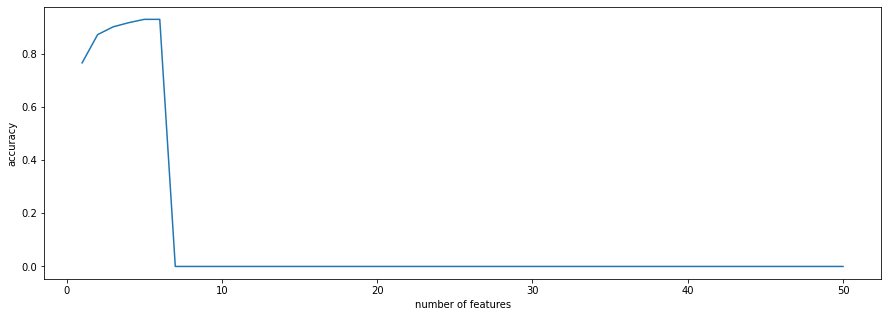

In [18]:
DataViz.plot_xy(x=[range(1, N_FORWARD_SELECTION+1)], y=[ordered_scores],
                xlabel='number of features', ylabel='accuracy')

In [21]:
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()
start = time.time()


reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
performance_training = []
performance_test = []
## Due to runtime constraints we run the experiment 3 times, yet if you want even more robust data one should increase the repetitions. 
N_REPEATS_NN = 3

In [22]:
for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, N_REPEATS_NN):

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(
            train_X, train_y,
            test_X, hidden_layer_sizes=(250, ), alpha=reg_param, max_iter=500,
            gridsearch=False
        )

        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/N_REPEATS_NN)
    performance_test.append(performance_te/N_REPEATS_NN)

/home/udy/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/udy/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/udy/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/udy/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/udy/.local/lib/python3.8/site-packages/sklearn/neural_netw

Figure saved to figures/figure_2.png


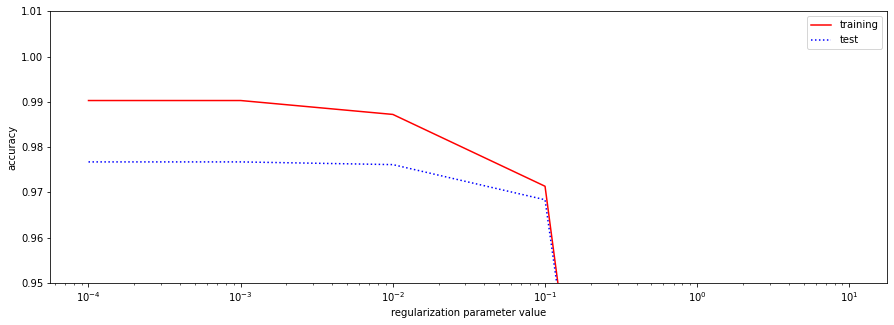

In [23]:
DataViz.plot_xy(x=[reg_parameters, reg_parameters], y=[performance_training, performance_test], method='semilogx',
                xlabel='regularization parameter value', ylabel='accuracy', ylim=[0.95, 1.01],
                names=['training', 'test'], line_styles=['r-', 'b:'])

In [24]:
N_KCV_REPEATS = 5

print('Preprocessing took', time.time()-start, 'seconds.')

scores_over_all_algs = []

Preprocessing took 1024.5424871444702 seconds.


In [27]:
selected_train_X = train_X[basic_features]
selected_test_X = test_X[basic_features]

# First we run our non deterministic classifiers a number of times to average their score.

performance_tr_nn = 0
performance_tr_rf = 0
performance_tr_svm = 0
performance_te_nn = 0
performance_te_rf = 0
performance_te_svm = 0

for repeat in range(0, N_KCV_REPEATS):
    print("Training NeuralNetwork run {} / {} ... ".format(repeat, N_KCV_REPEATS))
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )
    print("Training RandomForest run {} / {} ... ".format(repeat, N_KCV_REPEATS))
    performance_tr_nn += eval.accuracy(train_y, class_train_y)
    performance_te_nn += eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )

    performance_tr_rf += eval.accuracy(train_y, class_train_y)
    performance_te_rf += eval.accuracy(test_y, class_test_y)

    print("Training SVM run {} / {}".format(repeat, N_KCV_REPEATS))

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(
        selected_train_X, train_y, selected_test_X, gridsearch=True
    )
    performance_tr_svm += eval.accuracy(train_y, class_train_y)
    performance_te_svm += eval.accuracy(test_y, class_test_y)


overall_performance_tr_nn = performance_tr_nn/N_KCV_REPEATS
overall_performance_te_nn = performance_te_nn/N_KCV_REPEATS
overall_performance_tr_rf = performance_tr_rf/N_KCV_REPEATS
overall_performance_te_rf = performance_te_rf/N_KCV_REPEATS
overall_performance_tr_svm = performance_tr_svm/N_KCV_REPEATS
overall_performance_te_svm = performance_te_svm/N_KCV_REPEATS

#     #And we run our deterministic classifiers:
print("Determenistic Classifiers:")

print("Training Nearest Neighbor run 1 / 1")
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(
    selected_train_X, train_y, selected_test_X, gridsearch=True
)
performance_tr_knn = eval.accuracy(train_y, class_train_y)
performance_te_knn = eval.accuracy(test_y, class_test_y)
print("Training Descision Tree run 1 / 1")
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(
    selected_train_X, train_y, selected_test_X, gridsearch=True
)

performance_tr_dt = eval.accuracy(train_y, class_train_y)
performance_te_dt = eval.accuracy(test_y, class_test_y)
print("Training Naive Bayes run 1/1")
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(
    selected_train_X, train_y, selected_test_X
)

performance_tr_nb = eval.accuracy(train_y, class_train_y)
performance_te_nb = eval.accuracy(test_y, class_test_y)

scores_with_sd = util.print_table_row_performances(len(selected_train_X.index), len(selected_test_X.index), [
                                                                                            (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                            (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                            (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_dt, performance_te_dt),
                                                                                            (performance_tr_nb, performance_te_nb)])
scores_over_all_algs.append(scores_with_sd)


Training NeuralNetwork run 0 / 5 ... 
Training RandomForest run 0 / 5 ... 
Training SVM run 0 / 5
Training NeuralNetwork run 1 / 5 ... 
Training RandomForest run 1 / 5 ... 
Training SVM run 1 / 5
Training NeuralNetwork run 2 / 5 ... 
Training RandomForest run 2 / 5 ... 
Training SVM run 2 / 5
Training NeuralNetwork run 3 / 5 ... 
Training RandomForest run 3 / 5 ... 
Training SVM run 3 / 5
Training NeuralNetwork run 4 / 5 ... 
Training RandomForest run 4 / 5 ... 
Training SVM run 4 / 5
Determenistic Classifiers:
Training Nearest Neighbor run 1 / 1
Training Descision Tree run 1 / 1
Training Naive Bayes run 1/1


NameError: name 'feature_names' is not defined

In [29]:
scores_with_sd = util.print_table_row_performances("Normal", len(selected_train_X.index), len(selected_test_X.index), [
                                                                                            (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                            (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                            (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_knn, performance_te_knn),
                                                                                            (performance_tr_dt, performance_te_dt),
                                                                                            (performance_tr_nb, performance_te_nb)])
scores_over_all_algs.append(scores_with_sd)

Normal & 0.9928\emph{( 0.9901 - 0.9955 )}  & 0.9741\emph{( 0.9663 - 0.9819 )} & 0.9985\emph{( 0.9973 - 0.9997 )}  & 0.9803\emph{( 0.9735 - 0.9871 )} & 0.8517\emph{( 0.8403 - 0.8630 )}  & 0.8520\emph{( 0.8347 - 0.8694 )} & 0.9870\emph{( 0.9833 - 0.9906 )}  & 0.9809\emph{( 0.9742 - 0.9876 )} & 0.9870\emph{( 0.9833 - 0.9906 )}  & 0.9809\emph{( 0.9742 - 0.9876 )} & 0.9921\emph{( 0.9892 - 0.9949 )}  & 0.9612\emph{( 0.9518 - 0.9706 )} & 0.9008\emph{( 0.8912 - 0.9103 )}  & 0.9016\emph{( 0.8870 - 0.9161 )}\\\hline


IndexError: list index out of range

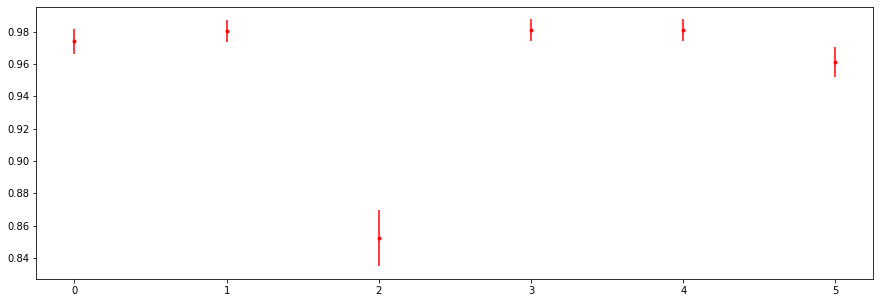

In [32]:
DataViz.plot_performances_classification(['NN', 'RF','SVM', 'KNN', 'DT', 'NB'], "Normal", scores_over_all_algs)